# Universidad de Buenos Aires
# Aprendizaje Profundo - TP2
# Cohorte 18 - 1er bimestre 2025


Este segundo TP comienza desde el día después de la clase 5 (2 de abril) y la ventana de entrega estará abierta hasta las **23hs del miércoles 23 de abril (hora de Argentina)**. La resolución del TP es **individual**. Pueden utilizar los contenidos vistos en clase y otra bibliografía. Si se toman ideas de fuentes externas deben ser correctamente citadas incluyendo el correspondiente link o página de libro.

El formato de entrega debe ser un link a un notebook de google colab (permitir acceso a gerardo.vilcamiza@ieee.org y gvilcamiza.ext@fi.uba.ar) y **se realizará en el siguiente link de google forms: [link](https://forms.gle/XatA691so4eVxZB68)**. Tanto los resultados, como el código y las explicaciones deben quedar guardados y visualizables en el colab.

NO ES NECESARIO QUE NOS ENVIEN COREEO AVISANDO DE LA ENTREGA.

**Consideraciones a tener en cuenta:**
- Se entregará 1 solo colab para este TP2.
- Renombrar el archivo de la siguiente manera: **APELLIDO-NOMBRE-DL-TP2-Co18.ipynb**
- Los códigos deben poder ejecutarse.
- Los resultados, cómo el código, los gráficos y las explicaciones deben quedar guardados y visualizables en el correspondiente notebook.

# **CLASIFICADOR DE EMOCIONES**

El objetivo de este trabajo es construir una red neuronal convolucional (CNN) utilizando Pytorch, capaz de clasificar emociones humanas a partir de imágenes faciales. El clasificador deberá identificar una de las 7 emociones básicas: alegría, tristeza, enojo, miedo, sorpresa, disgusto y seriedad. El dataset se encuentra en este link: https://drive.google.com/file/d/10EWwOriegjawQ3evl1nuIldY3pUR-hQc/view?usp=sharing

## 1. Preprocesamiento de Datos (2 puntos)

Antes de entrenar el modelo, se debe analizar qué tipo de preprocesamiento se debe aplicar a las imágenes. Para esto, se puede considerar uno o más aspectos como:

- Tamaño
- Relación de aspecto
- Color o escala de grises
- Cambio de dimensionalidad
- Normalización
- Balanceo de datos
- Data augmentation
- etc.

Sean criteriosos y elijan las técnicas que consideren pertinentes.

Recomendación: usar `torchvision.transforms` para facilitar el preprocesamiento.



## 2. Construcción y entrenamiento del Modelo CNN (3.5 puntos)

- Construir una red neuronal convolucional desde cero, sin usar modelos pre-entrenados.
- Analizar correctamente qué funciones de activación se deben usar en cada etapa de la red, el learning rate a utilizar, la función de costo y el optimizador.
- Cosas como el número de capas, neuronas, tamaño de kernel, entre otros, queda a criterio de ustedes.

## 3. Evaluación del Modelo (3.5 puntos)

El modelo entrenado debe ser evaluado utilizando las siguientes métricas:

- **Accuracy**:
  - Reportar el valor final en el conjunto de test.
  - Incluir una gráfica de evolución por época para entrenamiento y validación.

- **F1 Score**:
  - Reportar el valor final en el conjunto de test.
  - Incluir una gráfica de evolución por época para entrenamiento y validación.

- **Costo (Loss)**:
  - Mostrar una gráfica de evolución del costo por época para entrenamiento y validación.

- **Classification report**
  - Mostrar la precisión, recall y F1 score por cada clase usando `classification_report`

- **Matriz de confusión**:
  - Mostrar la matriz de confusión absoluta (valores enteros).
  - Mostrar la matriz de confusión normalizada (valores entre 0 y 1 por fila).

Se recomienda utilizar `scikit-learn` para calcular métricas como accuracy, F1 score, el Classification report y las matrices de confusión. Las visualizaciones pueden realizarse con `matplotlib` o `seaborn`, separando claramente los datos de entrenamiento y validación en las gráficas.


 ## 4. Prueba con Imágenes Nuevas (1 punto)
Subir al menos 3 imágenes personales (con el rostro de ustedes o de otras personas), que no formen parte del dataset de entrenamiento ni de testeo.

- Cada imagen debe representar una emoción distinta.

- Aplicar el mismo preprocesamiento que se usó para el dataset.

- Pasar las imágenes por el modelo entrenado y mostrar:

  - La imagen original (preprocesada)

  - La clase inferida por el modelo

- Redactar conclusiones y comentarios finales

# RESOLUCIÓN

### 0. LIBRERÍAS GENERALES

In [1]:
# For data manipulation
import numpy as np

# For visualization
import matplotlib.pyplot as plt

#### 1. PREPROCESAMIENTO DE DATOS

#### 1.1 PRELIMINAR

In [2]:
dataset_folderpath = './dataset_emociones/'

#### 1.2 SET TRANSFORMATION

In [3]:
import torch
from torchvision import datasets
from torchvision.transforms import v2           # usamos v2 porque es más rápido y presenta más capacidades
from torch.utils.data import DataLoader

# Definir transformaciones
transform = v2.Compose([
    # v2.Resize((150, 150)),                                    # Resize images
    # v2.RandomRotation(),                                      # Rotate images
    # v2.RandomResizedCrop(size=(224, 224), antialias=True),
    # v2.RandomHorizontalFlip(p=0.5),
    v2.Grayscale(1),                                             # Convert images to grayscale
    v2.ToImage(),                                   
    v2.ToDtype(torch.float32, scale=True),                      # Replace v1.ToTensor(): Convert images to tensor between [0,1]                                      # 
    v2.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),             # Normalize RGB channels

    # 6. Data augmentation
    # v2.RandomHorizontalFlip(),        # Aumenta los datos mediante inversión horizontal aleatoria.
    # v2.RandomRotation(degrees=15),    # Rota la imagen aleatoriamente hasta ±15 grados.
    # v2.ColorJitter(brightness=0.1, contrast=0.1, saturation=0.1, hue=0.1)  # Pequeños cambios en el color    
    ])

batch_size = 32

# Cargar el conjunto de entrenamiento
train_dataset = datasets.ImageFolder(root = dataset_folderpath + 'train', transform = transform)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# Cargar el conjunto de prueba
test_dataset = datasets.ImageFolder(root = dataset_folderpath + 'test', transform = transform)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


In [4]:
ntrain = len(train_dataset)
ntest = len(test_dataset)

train_size = ntrain / (ntrain + ntest)
test_size = ntest / (ntrain + ntest)

print("Dimension del set de train:", ntrain)
print("Dimension del set de test:", ntest)

print("Fracción de datos de train:", train_size)
print("Fracción de datos de test:", test_size)


Dimension del set de train: 12271
Dimension del set de test: 3068
Fracción de datos de train: 0.7999869613403742
Fracción de datos de test: 0.2000130386596258


In [16]:
nclasses = len(train_dataset.classes)

print("La cantidad de clases es: ", nclases)
print("Las clases son: ", train_dataset.classes)
print("Índice a Clase: ", train_dataset.class_to_idx)

La cantidad de clases es:  7
Las clases son:  ['alegria', 'disgusto', 'enojo', 'miedo', 'seriedad', 'sorpresa', 'tristeza']
Índice a Clase:  {'alegria': 0, 'disgusto': 1, 'enojo': 2, 'miedo': 3, 'seriedad': 4, 'sorpresa': 5, 'tristeza': 6}


In [6]:
for images, labels in train_loader:
    print(images.shape)  # Imprime la forma de las imágenes
    print(labels)        # Imprime las etiquetas (números enteros codificados)
    break  # Salir después del primer lote

torch.Size([32, 3, 100, 100])
tensor([0, 0, 6, 0, 4, 0, 0, 5, 4, 0, 0, 0, 0, 4, 6, 0, 6, 0, 0, 0, 0, 3, 0, 0,
        0, 5, 4, 4, 4, 0, 0, 2])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Label : alegria


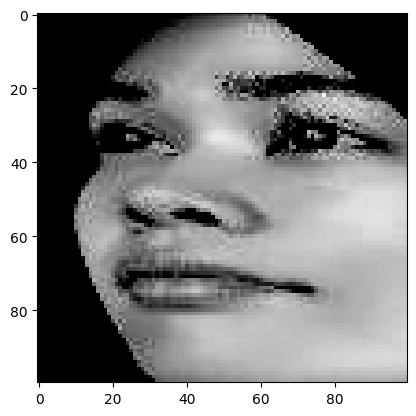

In [7]:
def display_img(img,label):
    print(f"Label : {train_dataset.classes[label]}")
    plt.imshow(img.permute(1,2,0))                  # Permute method reshapes the image from (3,150,150) to (150,150,3)

# Display the first image in the dataset
display_img(*train_dataset[0])

In [8]:
# Generamos el Validation Set
val_size = 0.20 / train_size                    # 20% del set total                 
val_size = int(val_size * ntrain)
train_size = ntrain - val_size
train_data, val_data = torch.utils.data.random_split(train_dataset, [train_size, val_size])

# Cargamos ambos sets
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_data, batch_size=batch_size, shuffle=False)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


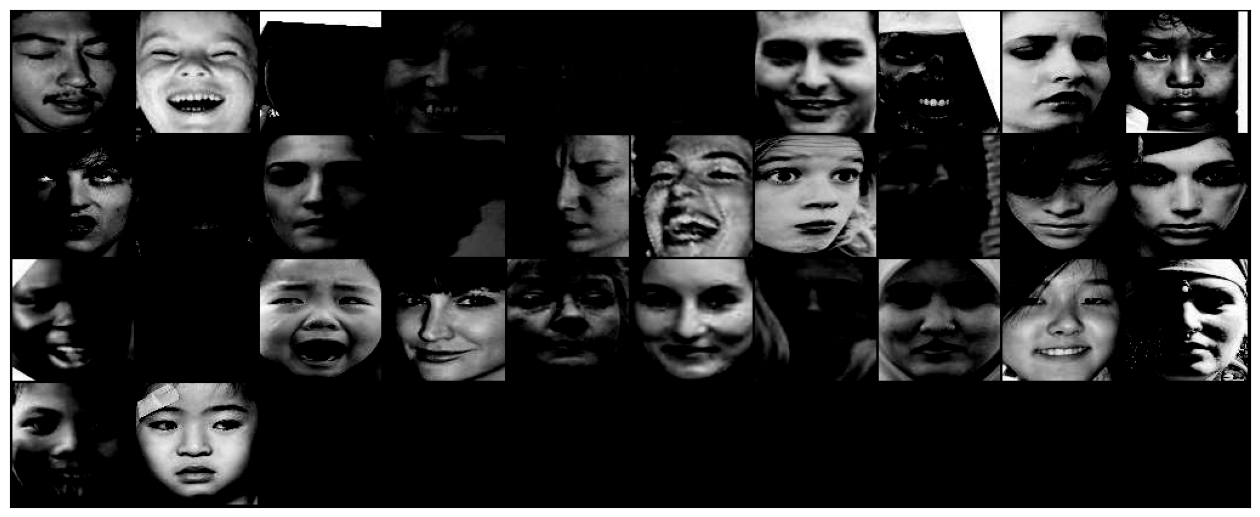

In [9]:
from torchvision.utils import make_grid

def show_batch(dl):
    """Plot images grid of single batch"""
    for images, labels in dl:
        fig,ax = plt.subplots(figsize = (16,12))
        ax.set_xticks([])
        ax.set_yticks([])
        ax.imshow(make_grid(images,nrow=10).permute(1,2,0))
        break
        
show_batch(train_loader)

#### 2. MODELO

Definimos una clase base con funcionalidades orientadas a entrenar el modelo, validarlo y obtener los resultados por epoch.

In [10]:
import torch.nn as nn
from torch import stack

class ImageClassificationBase(nn.Module):
    
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                                  # Generate predictions
        loss = nn.functional.cross_entropy(out, labels)     # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss.detach(), 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]     # Recover batch losses
        epoch_loss = stack(batch_losses).mean()             # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]        # Recover batch accuracies
        epoch_acc = stack(batch_accs).mean()                # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_enstridenum_conv_layersd(self, epoch, result):
        print("Epoch [{}], train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, result['train_loss'], result['val_loss'], result['val_acc']))

Defino ahora mi CNN tomando como base la clase "ImageClassificationBase" definida previamente.

In [18]:
# Bloque de convolución para emplear en mi red
def conv_block(c_in, c_out, activation = nn.ReLU(), k=3, p='same', s=1, pk=2):
    return nn.Sequential(                                   # el módulo Sequential se engarga de hacer el forward de todo lo que tiene dentro.
        nn.Conv2d(c_in, c_out, k, padding=p, stride=s),     # conv
        activation,                                         # activation
        nn.MaxPool2d(pk)                                    # pooling
    )

# Función auxiliar para calcular la dimensión de salida de la red convolucional
def calculate_output_dimensions(input_height, 
                                input_width, 
                                n_conv_layers, 
                                kernel_size, 
                                padding_type, 
                                stride, 
                                pooling_kernel_size):
    heights = []
    widths = []

    if padding_type == 'valid':
        padding = 0
    elif padding_type == 'same':
        padding = kernel_size // 2
    elif padding_type == 'full':
        padding = kernel_size - 1

    current_height = input_height
    current_width = input_width

    for _ in range(n_conv_layers):
        # Calcula la salida de la capa convolucional
        current_height = (current_height + 2 * padding - kernel_size) // stride + 1
        current_width = (current_width + 2 * padding - kernel_size) // stride + 1

        # Aplica el max pooling
        current_height = (current_height - pooling_kernel_size) // pooling_kernel_size + 1
        current_width = (current_width - pooling_kernel_size) // pooling_kernel_size + 1

        # Guarda la altura y el ancho después de cada capa
        heights.append(current_height)      # Guarda la altura
        widths.append(current_width)        # Guarda el ancho

    return heights, widths

In [31]:
class CNN_EmotionClassifier(ImageClassificationBase):
    def __init__(self, 
                 inputs_by_conv_layer = [1, 32],    # Convolutional layers
                 inputs_by_hidden_layer = [],       # Fully connected HIDDEN layers
                 n_outputs = None,
                 in_height = None,
                 in_width = None,
                 info = True):
        
        super().__init__()

        # -----------------------------------------------------
        # ACTIVATION FUNCTION
        # -----------------------------------------------------

        self.activation = nn.ReLU()

        # -----------------------------------------------------
        # CONVOLUTIONAL LAYERS
        # -----------------------------------------------------

        self.kernel = 3
        self.padding = 'same'
        self.stride = 1
        self.poolingk = 2

        self.conv = nn.ModuleList()
        self.n_conv_layers = len(inputs_by_conv_layer) - 1

        for i in range(self.n_conv_layers):
            self.conv.append(conv_block(inputs_by_conv_layer[i], 
                                        inputs_by_conv_layer[i+1], 
                                        activation = self.activation, 
                                        k=self.kernel, 
                                        p=self.padding, 
                                        s=self.stride,
                                        pk=self.poolingk))
            
        conv_heights, conv_width = calculate_output_dimensions(in_height, 
                                                                in_width,
                                                                self.n_conv_layers, 
                                                                self.kernel, 
                                                                self.padding, 
                                                                self.stride, 
                                                                self.poolingk)  

        # -----------------------------------------------------
        # FULLY CONNECTED HIDDEN LAYERS
        # -----------------------------------------------------

        self.lin = nn.ModuleList()
       
        conv_out_height = conv_heights[-1]  # Altura de salida de la última capa convolucional
        conv_out_width = conv_width[-1]     # Ancho de salida de la última capa convolucional
        inputs_by_lin_layer = [inputs_by_conv_layer[-1]*conv_out_height*conv_out_width]
        inputs_by_lin_layer.extend(inputs_by_hidden_layer)

        self.n_lin_layers = len(inputs_by_lin_layer) - 1
        for i in range(self.n_lin_layers):
            self.lin.append(nn.Linear(in_features=inputs_by_lin_layer[i], out_features=inputs_by_lin_layer[i + 1]))
        
        # -----------------------------------------------------
        # OUTPUT LAYERS
        # -----------------------------------------------------

        self.output = nn.Linear(in_features=inputs_by_lin_layer[-1], out_features=n_outputs)  # Output size igual a n_classes

        if info:
            print('Neural Network successfully built')
            print('Architecture:')
            print(' ')        
            print(self)
            print(' ')        
            print('Número total de capas de Convolucionales: ', self.n_conv_layers)
            print('Número total de capas de Fully Connected: ', self.n_lin_layers+1)
            print('Número total de capas : ', self.n_conv_layers + self.n_lin_layers + 1)       

        # Me fijo en el número de parámetros entrenables
        pytorch_total_params = sum(p.numel() for p in self.parameters() if p.requires_grad)
        print('Número total de parámetros a entrenar: ', pytorch_total_params)

    def forward(self, x):
        # Forward step
        # CONVOLUTIONAL LAYERS
        for i in range(self.n_conv_layers):
            x = self.conv[i](x)
        x = x.flatten(start_dim=1)
        # HIDDEN LAYERS
        for i in range(self.n_lin_layers):
            x = self.lin[i](x)
        # OUTPUT LAYER
        x = self.output(x)  # No aplicar softmax aquí, se aplica en la pérdida
        return x  # Return Logits

In [32]:
# CNN parameters
n_channels = 1
n_conv_layers = 3
last_cout = 4
inputs_by_conv_layer = [n_channels, last_cout]
for i in range(n_conv_layers-1):
    inputs_by_conv_layer.append(last_cout * 2)
    last_cout *= 2

# FCNN Hidden parameters
inputs_by_hidden_layer = [64, 128]

# Instanciamos la red
cnn_model = CNN_EmotionClassifier(inputs_by_conv_layer,
                 inputs_by_hidden_layer,
                 n_outputs = nclasses,
                 in_height = 100,
                 in_width = 100)

Neural Network successfully built
Architecture:
 
CNN_EmotionClassifier(
  (activation): ReLU()
  (conv): ModuleList(
    (0): Sequential(
      (0): Conv2d(1, 4, kernel_size=(3, 3), stride=(1, 1), padding=same)
      (1): ReLU()
      (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    )
    (1): Sequential(
      (0): Conv2d(4, 8, kernel_size=(3, 3), stride=(1, 1), padding=same)
      (1): ReLU()
      (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    )
    (2): Sequential(
      (0): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1), padding=same)
      (1): ReLU()
      (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    )
  )
  (lin): ModuleList(
    (0): Linear(in_features=2304, out_features=64, bias=True)
    (1): Linear(in_features=64, out_features=128, bias=True)
  )
  (output): Linear(in_features=128, out_features=7, bias=True)
)
 
Número total de capas de Convolucionales:  3
Númer

In [35]:
import torchinfo as torchinfo

torchinfo.summary(cnn_model)

Layer (type:depth-idx)                   Param #
CNN_EmotionClassifier                    --
├─ReLU: 1-1                              --
├─ModuleList: 1-2                        --
│    └─Sequential: 2-1                   --
│    │    └─Conv2d: 3-1                  40
│    │    └─ReLU: 3-2                    --
│    │    └─MaxPool2d: 3-3               --
│    └─Sequential: 2-2                   --
│    │    └─Conv2d: 3-4                  296
│    │    └─ReLU: 3-5                    --
│    │    └─MaxPool2d: 3-6               --
│    └─Sequential: 2-3                   --
│    │    └─Conv2d: 3-7                  1,168
│    │    └─ReLU: 3-8                    --
│    │    └─MaxPool2d: 3-9               --
├─ModuleList: 1-3                        --
│    └─Linear: 2-4                       147,520
│    └─Linear: 2-5                       8,320
├─Linear: 1-4                            903
Total params: 158,247
Trainable params: 158,247
Non-trainable params: 0

In [36]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

  
@torch.no_grad()
def evaluate(model, val_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

  
def fit(epochs, lr, model, train_loader, val_loader, opt_func = torch.optim.SGD):
    
    history = []
    optimizer = opt_func(model.parameters(),lr)
    for epoch in range(epochs):
        
        model.train()
        train_losses = []
        for batch in train_loader:
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        model.epoch_end(epoch, result)
        history.append(result)
    
    return history

In [38]:
num_epochs = 30
opt_func = torch.optim.Adam
lr = 0.001
#fitting the model on training data and record the result after each epoch
history = fit(num_epochs, lr, cnn_model, train_loader, val_loader, opt_func)

RuntimeError: Given groups=1, weight of size [4, 1, 3, 3], expected input[32, 3, 100, 100] to have 1 channels, but got 3 channels instead

In [ ]:
# función de entrenamiento
def fit(model, dataloader, epochs=15):
    # enviamos el modelo al device
    model.to(device)
    # definimo optimizer y la función de pérdida
    optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)
    criterion = torch.nn.CrossEntropyLoss()
    # preparamos listas para guardar las loss y la acc a lo largo de la epocas
    epoch_t_loss = []
    epoch_v_loss = []
    epoch_t_acc = []
    epoch_v_acc = []
    # iteramos en las epocas
    for epoch in range(1, epochs+1):
        # ponemos el modelo en train
        model.train()
        # listas de loss y acc de train para esta epoca
        # así despues calculamos la media
        # por que el dataset lo pasamos de a batches
        train_loss, train_acc = [], []
        bar = tqdm(dataloader['train'])
        for batch in bar:
            X, y = batch  # sacamos X e y del batch
            X, y = X.to(device), y.to(device) # lo enviamos al device
            optimizer.zero_grad() # llevamos optimizer a zero
            y_hat = model(X)  # corremos el modelo y vemos su predicción
            loss = criterion(y_hat, y)  # calculamos la pérdida
            loss.backward() # back-propagations
            optimizer.step()  # step del optimizer
            train_loss.append(loss.item()) # vamos guardando la pérdida de este batch, en la perdida de la epoca
            # calculo de la acc
            acc = (y == torch.argmax(y_hat, axis=1)).sum().item() / len(y)
            train_acc.append(acc) # vamos guardando la acc de este batch, en la acc de la epoca
            # seteamos descriptores en la barra
            bar.set_description(f"loss {np.mean(train_loss):.5f} acc {np.mean(train_acc):.5f}")

        # luego de pasar todo el batch, guardamos la perdida y acc media del train
        epoch_t_loss.append(np.mean(train_loss))
        epoch_t_acc.append(np.mean(train_acc))


        # ahora viene es test
        bar = tqdm(dataloader['test'])
        # listas de loss y acc de test para esta epoca
        # así despues calculamos la media
        # por que el dataset lo pasamos de a batches
        val_loss, val_acc = [], []
        # ponemos en eval el modelo
        model.eval()
        with torch.no_grad():
            for batch in bar:
                X, y = batch
                X, y = X.to(device), y.to(device)
                y_hat = model(X)
                loss = criterion(y_hat, y)
                val_loss.append(loss.item())
                acc = (y == torch.argmax(y_hat, axis=1)).sum().item() / len(y)
                val_acc.append(acc)
                bar.set_description(f"val_loss {np.mean(val_loss):.5f} val_acc {np.mean(val_acc):.5f}")
        print(f"Epoch {epoch}/{epochs} loss {np.mean(train_loss):.5f} val_loss {np.mean(val_loss):.5f} acc {np.mean(train_acc):.5f} val_acc {np.mean(val_acc):.5f}")

        epoch_v_loss.append(np.mean(val_loss))
        epoch_v_acc.append(np.mean(val_acc))

    plt.figure()
    plt.plot(epoch_t_loss, 'r')
    plt.plot(epoch_v_loss, 'g')
    plt.title('loss')
    plt.legend(['train loss', 'val loss'])
    plt.grid()

    plt.figure()
    plt.plot(epoch_t_acc, 'r')
    plt.plot(epoch_v_acc, 'g')
    plt.title('acc')
    plt.legend(['train acc', 'val acc'])
    plt.grid()
    plt.show()

In [ ]:
fit(model, dataloader)

In [ ]:
# verifico sus dimensiones
print(f"Tamaño del batch de feature (input / imagen): {train_features.size()}")
print(f"Tamaño del batch del label (clase / etiqueta): {train_labels.size()}")

In [ ]:

# tomo 1 imagen para poder visualizarla
# y verifico sus dimensiones

img = train_features[5]
print('tamaño de 1 imagen: ', img.shape)
# le QUITO 1 dimension (la del tamaño del batch) para poder graficar
img = img.squeeze()
print('tamaño de 1 imagen DESPUES de squeeze: ', img.shape)
label = train_labels[5]

# ploteo esa imagen
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

NameError: name 'train_features' is not defined

In [ ]:
import optuna

def objective(trial):
    lr = trial.suggest_loguniform('lr', 1e-5, 1e-2)
    optimizer = optim.Adam(model.parameters(), lr=lr)
    # Run training loop and return final loss
    return final_loss

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=10)
print("Best hyperparameters:", study.best_params)

ModuleNotFoundError: No module named 'optuna'